In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

from keras.datasets import mnist # مثل دیجیت ولی جای 8.8 الان 28.28

In [17]:
data = mnist.load_data()

In [18]:
(x_train, y_train), (x_test, y_test) = data

In [19]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

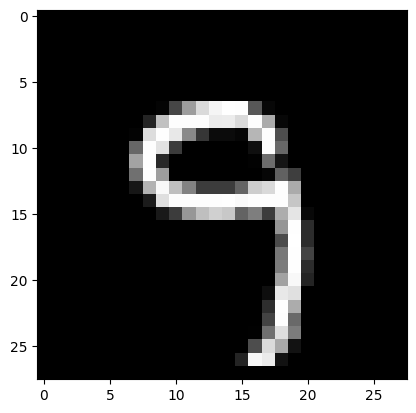

In [20]:
plt.imshow(x_train[14116], cmap='gray')

In [21]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [22]:
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
y_train_oh[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [23]:
x_train_vec = x_train.reshape(60000, -1)/255
x_test_vec = x_test.reshape(10000, -1) /255

In [24]:
x_train.shape,x_train_vec.shape


((60000, 28, 28), (60000, 784))

In [25]:
print(x_train_vec.max(), x_train_vec.min())

1.0 0.0


- در شبکه عصبی دیتارو بیاریم روی 0 و1 که شبکه سبک تر بشه
- تصویر معمولا نرمال نیست

In [26]:
len(np.unique(y_train)),x_train_vec.shape[1]

(10, 784)

In [27]:
model = Sequential()

model.add(Input(shape = (x_train_vec.shape[1],)))

model.add(Dense(x_train_vec.shape[1],activation='relu'))

model.add(Dense(256,activation='relu'))

model.add(Dense(len(np.unique(y_train)),activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 784)               615440    
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 818,970
Trainable params: 818,970
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

![alt text](image-10.png)

- CSVLogger -> بعد هر تپوک نتایج رو سیو کنه 
- LambdaCallback -> تابع میدی تابع مارو صدا میزنه

In [29]:
from keras.callbacks import EarlyStopping

# monitor: str = "val_loss",
# min_delta: تا وقتی تعیرات دیگه صفر باشه
# patience: میگه صبر کن ببین به ازای ان تا اپوک صبر کن تا دلتا رو تست کنی 
# verbose: چاپ بکنه چیزی
# mode: str = "auto", تشخصیص خودکار بالارونده یا پایین رونده بودن  مثلا لاس باید بریم مینیموم
# baseline: حداقلی که باید از فلان بالاتر بره. حداقل انقدر کیفیت رو میخام
# restore_best_weights: bool = False, اگه ترو باشه میاد بهترین وزن هارو میزاره تو خروجی مثلا اگه ما 10 تا رفتیم بهترین وزن 8 بوده اونو میزاره
# start_from_epoch: int = از کدوم اپوک شروع کنه

In [30]:
es = EarlyStopping(min_delta=0.01,patience=2,verbose=True)

res = model.fit(x_train_vec,y_train_oh,epochs=10,validation_data=(x_test_vec,y_test_oh),callbacks=[es])

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1826 - accuracy: 0.9446 - val_loss: 0.1362 - val_accuracy: 0.9565
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0798 - accuracy: 0.9751 - val_loss: 0.0971 - val_accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0563 - accuracy: 0.9820 - val_loss: 0.0790 - val_accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0407 - accuracy: 0.9872 - val_loss: 0.0779 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0334 - accuracy: 0.9894 - val_loss: 0.0876 - val_accuracy: 0.9763
Epoch 5: early stopping


In [31]:
# es = EarlyStopping(min_delta=0.01,patience=10,verbose=True)

# res = model.fit(x_train_vec,y_train_oh,epochs=10,validation_data=(x_test_vec,y_test_oh))

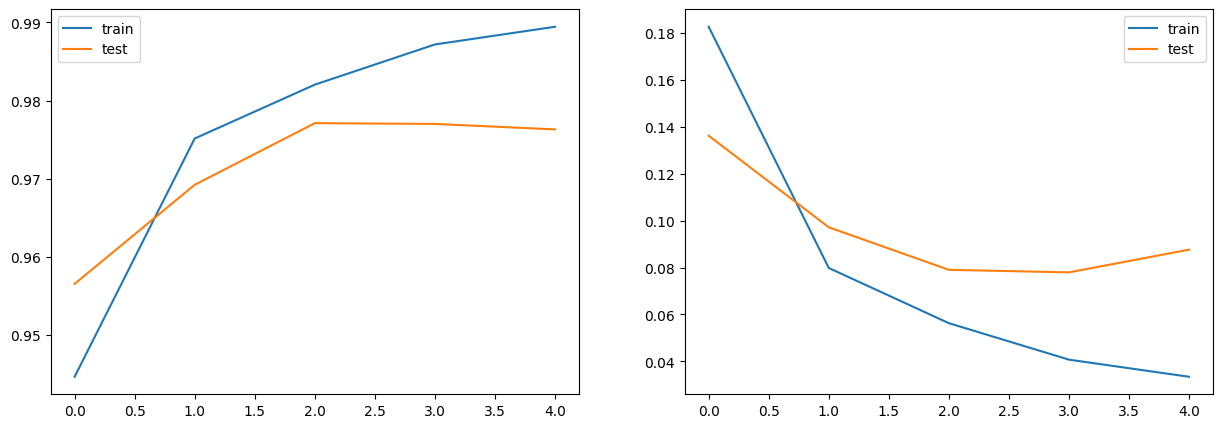

In [32]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.legend(['train','test'])
plt.subplot(1,2,2)
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['train','test']);

In [33]:
model.save('1_3_model.h5')